# Компьютерное зрение
### Часть 2

# Шумы на изображении

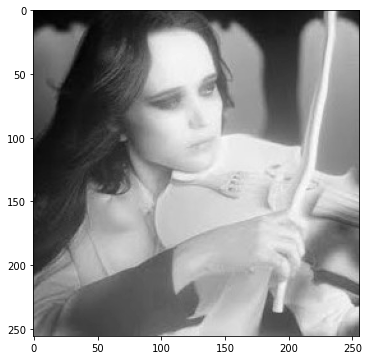

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./data/image.jpg', 0)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.show()

### Нормальный (гаусcовый) шум

In [2]:
def gauss_noise(image):
    row, col = image.shape
    
    mean = 0
    var = 0.1
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col)) * 16
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    
    return noisy.astype(np.uint8)

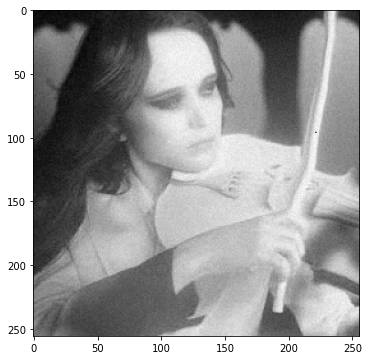

In [3]:
noised = gauss_noise(image)
plt.figure(figsize=(6, 6))
plt.imshow(noised, cmap='gray')
plt.show()

#### Удаление шума

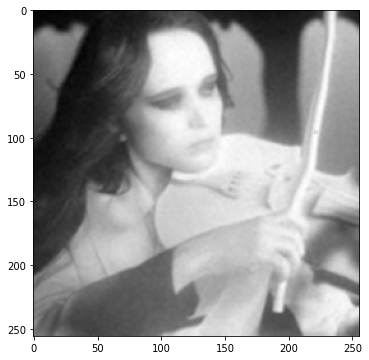

In [4]:
# Гауссово размытие
blured = cv2.GaussianBlur(noised, (3, 3), 3)
plt.figure(figsize=(6, 6))
plt.imshow(blured, cmap='gray')
plt.show()

### Шум Соль и перец

In [5]:
def salt_and_pepper_noise(image, s_vs_p=0.5, amount=0.004):
    row, col = image.shape
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[tuple(coords)] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[tuple(coords)] = 0
    return out

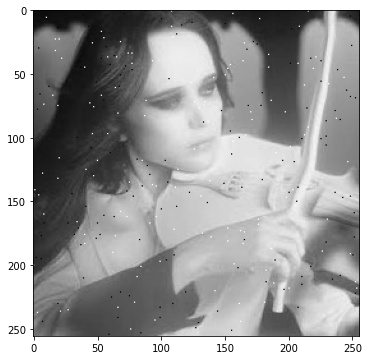

In [6]:
noised = salt_and_pepper_noise(image)
plt.figure(figsize=(6, 6))
plt.imshow(noised, cmap='gray')
plt.show()

#### Удаление шума

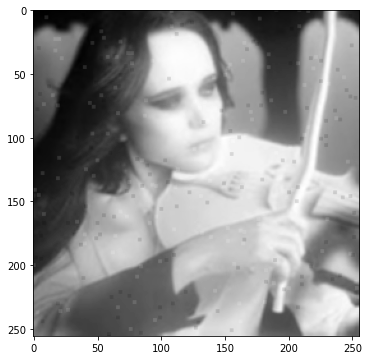

In [7]:
# Гауссово размытие
blured = cv2.GaussianBlur(noised, (3, 3), 3)
plt.figure(figsize=(6, 6))
plt.imshow(blured, cmap='gray')
plt.show()

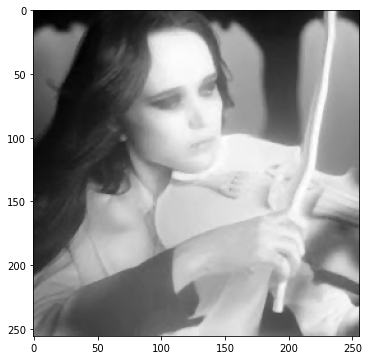

In [8]:
# Медианный фильтр
blured = cv2.medianBlur(noised, 3)
plt.figure(figsize=(6, 6))
plt.imshow(blured, cmap='gray')
plt.show()

# Детектор границ Канни (Canny)

Края(границы) — это такие кривые на изображении, вдоль которых происходит резкое изменение яркости или других видов неоднородностей.

Проще говоря, край — это резкий переход/изменение яркости.
Причины возникновения краёв:
* изменение освещенности
* изменение цвета
* изменение глубины сцены (ориентации поверхности)

Самым популярным методом выделения границ является детектор границ Кенни.

Хотя работа Кенни была проведена на заре компьютерного зрения (1986), детектор границ Кенни до сих пор является одним из лучших детекторов.

Шаги детектора:
* Убрать шум и лишние детали из изображения
* Рассчитать градиент изображения
* Сделать края тонкими (edge thinning)
* Связать края в контура (edge linking)

Границы на изображении могут находиться в различных направлениях, поэтому алгоритм Кенни использует четыре фильтра для выявления горизонтальных, вертикальных и диагональных границ. Воспользовавшись оператором обнаружения границ (например, оператором Собеля) получается значение для первой производной в горизонтальном направлении (Gу) и вертикальном направлении (Gx).  
Из этого градиента можно получить угол направления границы:

    Q=arctan(Gx/Gy)

Угол направления границы округляется до одной из четырех углов, представляющих вертикаль, горизонталь и две диагонали (например, 0, 45, 90 и 135 градусов).  
Затем идет проверка того, достигает ли величина градиента локального максимума в соответствующем направлении.

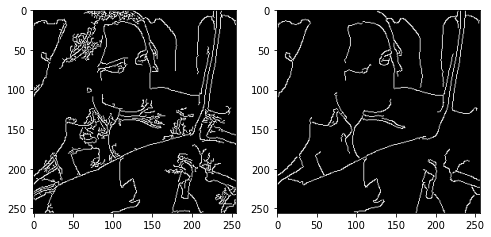

In [9]:
blured = cv2.GaussianBlur(image, (3, 3), 3)
edges_orig = cv2.Canny(image, 10, 200)
edges_blur = cv2.Canny(blured, 10, 200)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(edges_orig, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(edges_blur, cmap='gray')
plt.show()

# Аугментация данных

**Аугментация данных** (data augmentation) – это методика создания дополнительных обучающих данных из имеющихся данных. Для достижения хороших результатов глубокие сети должны обучаться на очень большом объеме данных. Следовательно, если исходный обучающий набор содержит ограниченное количество изображений, необходимо выполнить аугментацию, чтобы улучшить результаты модели.

Можно использовать следующие искажения:
* Геометрические (афинные, проективные, ...);
* Яркостные/цветовые;
* Замена фона;
* Искажения, характерные для решаемой задачи: блики, шумы, размытие и т. д.

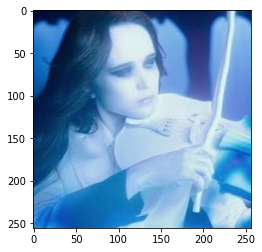

In [10]:
image = cv2.imread('./data/Vanya.jpg')[..., ::-1]
plt.imshow(image)
plt.show()

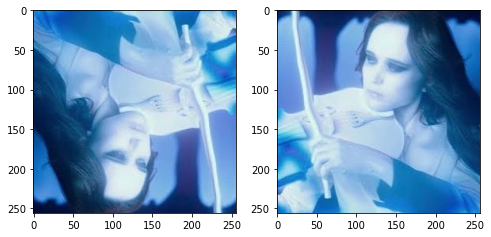

In [11]:
### Отражение
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image[::-1])
plt.subplot(1, 2, 2)
plt.imshow(cv2.flip(image, 1))
plt.show()

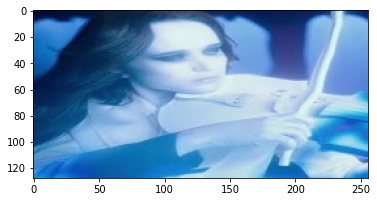

In [12]:
### Изменение размера
result = cv2.resize(image, (256, 128))
plt.imshow(result)
plt.show()

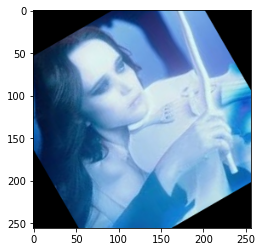

In [13]:
### Поворот
rot_mat = cv2.getRotationMatrix2D((128, 128), 30, 1.0)
result = cv2.warpAffine(image, rot_mat, (256, 256), flags=cv2.INTER_LINEAR)
plt.imshow(result)
plt.show()

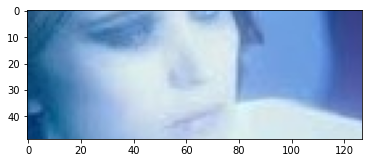

In [14]:
# Случайное образание
np.random.seed(43)
bbox = np.random.randint(0, 128, size=4)  # x, y, w, h
result = image[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
plt.imshow(result)
plt.show()

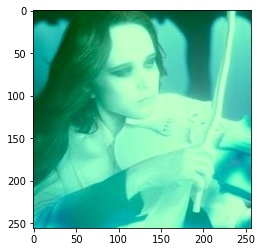

In [15]:
# Сдвиг по каналам
np.random.seed(42)
rgb_shift = np.random.randint(-128, 128, size=3)
result = image.astype(np.int32) + rgb_shift  # Зачем переводим в np.int32?
result = np.clip(result, 0, 255).astype(np.uint8)  # Обрезаем значения до диапазона 0 - 255
plt.imshow(result)
plt.show()

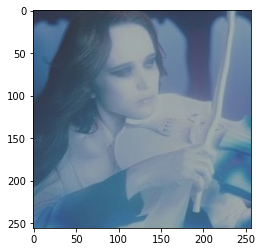

In [16]:
# Изменение яркости, контрастности
alpha, betta = 0.5, 50
result = alpha*image.astype(np.int32) + betta
result = np.clip(result, 0, 255).astype(np.uint8)
plt.imshow(result)
plt.show()

# Сравнение изображений

Задача:  
    **Имеются 2 изображения, содержащие объекты. Определить, содержат ли изображения одинаковые объекты?**

## Прямое сопоставление (корреляция)

$$
R(x, y) = {{\sum_{x', y'}T(x', y')*I(x+x', y+y')} \over \sqrt{\sum_{x', y'}T^2(x', y')\sum_{x', y'}I^2(x+x', y+y')}}
$$

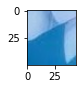

In [17]:
template = image[175:225, 75:120].copy()
plt.figure(figsize=(1, 1))
plt.imshow(template)
plt.show()

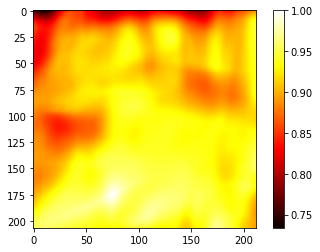

In [18]:
match = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
plt.imshow(match, cmap='hot')
plt.colorbar()
plt.show()

# Локальные особенности

Этапы работы с локальными особенностями:
* Извлечение признаков или выделение областей с локальными особенностями
* Описание признаков, хорактерных для выбранных особенностей
* Сравнение признаков между собой

Необходимые требования к особенностям:
* Повторяемость (не зависит от ракурса, освещения и т.п.)
* Значимость (уникальное описание для точек)
* Локальность (маленькая площадь)

В качестве локальных особенностей в основном используюут **углы** и **пятна**

## Детектор углов Харриса

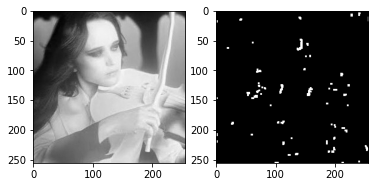

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')
plt.show()

# Описание локальных особенностей

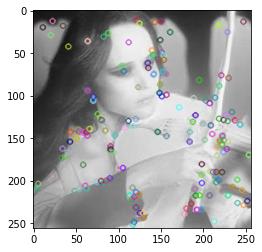

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)

result = image.copy()
result = cv2.drawKeypoints(gray, kp, result)
plt.imshow(result, cmap='gray')
plt.show()

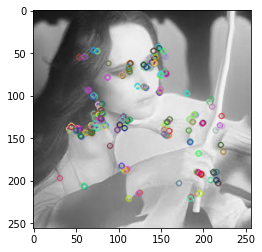

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.ORB_create()
kp = sift.detect(gray, None)

result = image.copy()
result = cv2.drawKeypoints(gray, kp, result)
plt.imshow(result, cmap='gray')
plt.show()

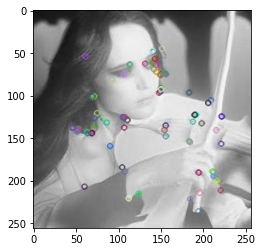

In [27]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.BRISK_create()
kp = sift.detect(gray, None)

result = image.copy()
result = cv2.drawKeypoints(gray, kp, result)
plt.imshow(result, cmap='gray')
plt.show()

# Сравнение признаков

In [30]:
# read images
img1 = cv2.imread('data/eiffel1.png')  
img2 = cv2.imread('data/eiffel2.png') 

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

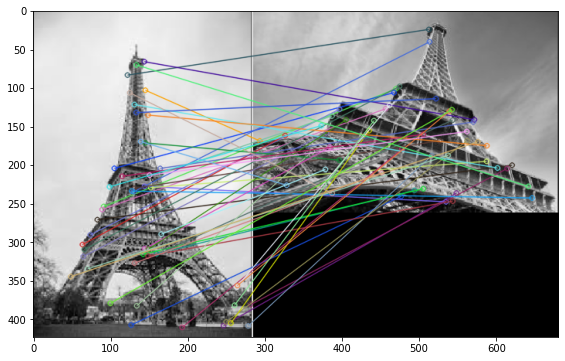

In [31]:
plt.figure(figsize=(10, 6))
plt.imshow(img3)
plt.show()

# Другие возможности OpenCV
* Калибровка камер
* Стереозрение
* Построение карты глубины
* Построение 3Д моделей по нескольким изображениям
* Отслеживание объектов на видео
* Детектор лиц
и многе другое

# Задача Хэллоуинский переполох

<img src="images/LessonsI/Helloween.png" alt="Helloween" height=60% width=60%>

Из дома с привидениями разбежались все призраки и проказничают в саду. Помогите хозяину дома поймать всех призраков.
Орентировки на призраков нужно скачать [тут](https://drive.google.com/file/d/1NjyvMtLGVisiz6jNBgO8H6efKZE8tiol/view?usp=sharing)


## RoadMap
Ловлю призраков необходимо реализовать через поиск и сопоставление ключевых точек на изображениях. Алгоритм должен состоять из следующих шагов:
* Загрузка изображения, на котором необходимо осуществлять поиск;
* Загрузка изображения(ий) призраков; 
* Обнаружить на них ключевые точки и вычислить для них любые понравившиеся вам дескрипторы SIFT, SURF, ORB;
* Сопоставить точки шаблона (призрака) с точками изображения через Brute-Force Matching или FLANN Matching  и найти какой области соответстветствует призрак;
* Найти гомографию используя алгоритм RANSAC. Выделить призрака на изображение рамкой.

Ключевые слова для поиска в Google и документации OpenCV: *findHomography, RANSAC, SIFT_Create, FlannBasedMatcher.*

Минимальная задача: нужно поймать одного призрака
Полная задача: нужно поймать всех призраков


## Гомография
Мифическая сказка из Библии рассказывает о первой для людей инженерной катастрофе — Вавилонская башняએ. У проекта было всё: ясная миссия, огромный человеческий ресурс, отсутствие временных ограничений и адекватные технологии (кирпичи и строительный раствор). Тем не менее, всё это эффектно провалилось, потому что Бог перепутал языки и люди больше не смогли общаться.

Такие термины, как «гомография», сбивают с толку и напоминают, как мы всё еще частенько боремся с общением. Гомография — такая простая концепция, но так странно называется!
Что есть гомография?

Рассмотрим два изображения на плоскости (обложка книги), показанные на рисунке. Красная точка представляет одну и ту же физическую точку на двух изображениях. В жаргоне компьютерного зрения они называются corresponding points (точки соответствия). На рисунке показаны четыре точки соответствия в четырех разных цветах — красный, зеленый, желтый и оранжевый. Гомография — это преобразование (матрица 3×3), которое отображает точки одного изображения в точки соответствия другого изображения.
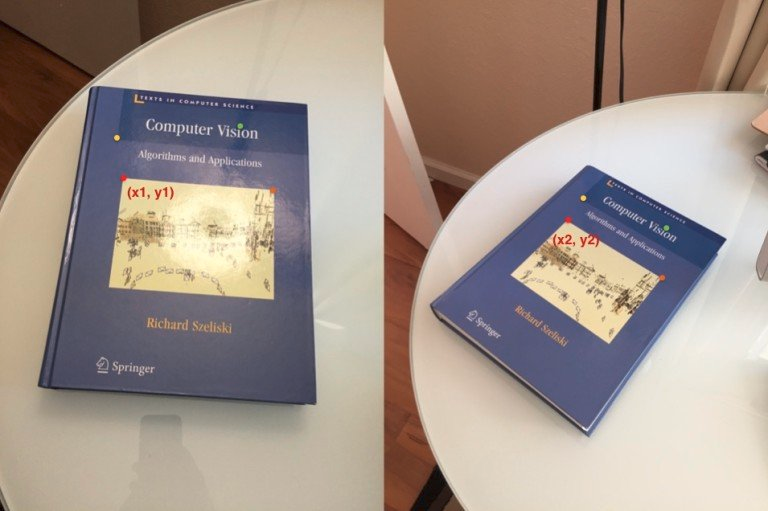

## Панорама есть приложение гомографии

В предыдущем разделе вы узнали, что при известной гомографией между двумя изображениями, можно трансформировать одно изображение в другое. Однако, есть одна тонкость. На изображении должна быть плоскость (обложка книги) и только фрагмент на плоскости может быть правильно трансформирован. Оказывается, если сделаеть снимок любой сцены (и не только плоской), а затем сделаете второй снимок, повернув камеру, то эти два изображения будут связаны гомографией! Другими словами, вы можете установить камеру на штатив и сделать снимок. Затем горизонтально сместить камеру и сделайте еще один снимок. Два изображения совершенно произвольной трехмерной сцены, которые вы только что сделали, будут связаны гомографией. На этих двух изображениях будут некоторые общие фрагменты, которые могут быть выровнены и сшиты так, что получится панорама из двух изображений. Что всё так просто? Нет! (извините, что разочаровал) На создание хорошей панорамы уходит много времени, но основной принцип заключается в том, чтобы с использованием гомографии выравнивать и сшивать так, чтобы швов было не видно. Созданию панорамы, безусловно, будет посвящена одна из следующих статей.